<h1 align = "center ">Credit Fraud Detection </h1>

## Problem:

Credit Card Fraud Detection involves modelling the card transactions using the the transaction history based on the ones that turned out to be fraud. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Data description

The datasets contains **transactions made by credit cards in September 2013** by european cardholders. This dataset presents transactions that occurred in two days, **where we have 492 frauds out of 284,807 transactions**. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains **only numerical input** variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. **Features V1, V2, ... V28 are the principal components obtained with PCA**, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Data was obtained for credit card fraud detection dataset from Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud

## Data exploration

Firstable we need to explore and understand data. Most of our data is quantitive features anonymised for privacy concerns. That features went throught PCA transformation so I assumed that data was scaled. Normalization is important in PCA since it is a variance maximizing exercise. It projects your original data onto directions which maximize the variance.

In [1]:
#### Import libraries

#File management 
import os
import sys
sys.path.append('..')

#Data analysis
import numpy as np
import pandas as pd

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#modules
from src.utils.utils import reduce_memory,df_basic_info,print_best_corelations
from src.visualization import visualize as vis

In [2]:
df = pd.read_csv("../data/raw/creditcard.csv")
#df1 = reduce_memory(df)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df_basic_info(df)

Basic summary : 

Features :  31

PCA Features : 28 -- float64
Other Features : Time -- float64 Amount -- float64
Labels : Class [0 1] -- int64

Rows :  284807

Class normal :  284315
Fraud :  492
Fraud cases percentage :  0.173 %

Missing values :  0


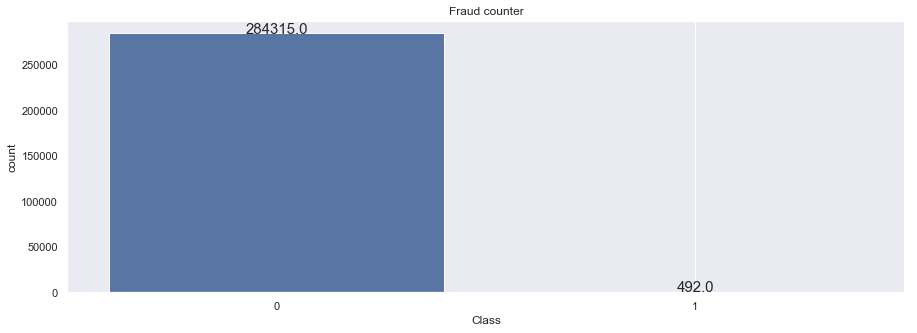

In [6]:
vis.plot_frauds_counter(df)

In [11]:
df.columns[1:-2]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

## Features Analysis

#### PCA Components

5 components ratio :  0.415598286544103
10 components ratio :  0.6474233285762651
15 components ratio :  0.8032075897924196
20 components ratio :  0.915427305819667
25 components ratio :  0.9835865046575711


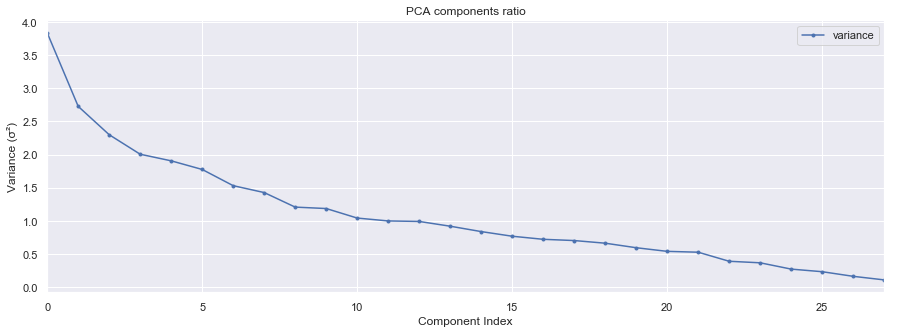

In [7]:
df_29 = df[df.columns[1:29]]
df_pca = vis.plot_pca_components(df_29)

#### Features Distribution

<Figure size 432x288 with 0 Axes>

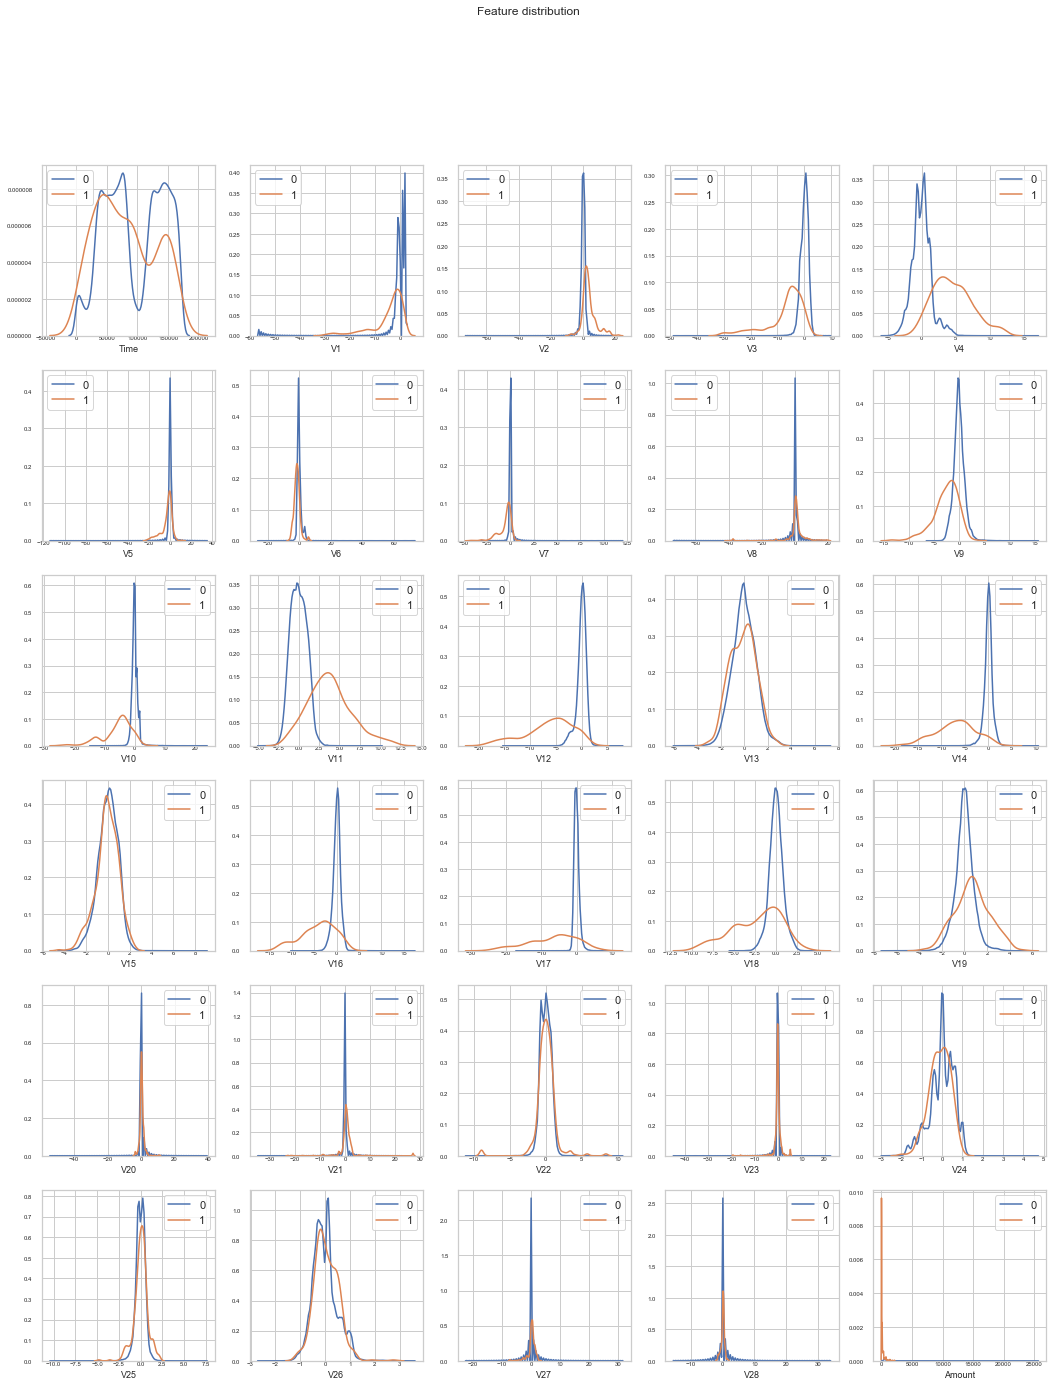

In [8]:
features = df.columns.values[:-1]
vis.plot_feature_distribution(df,features,'0','1')

PCA Features are normalized, so we need to check amout and time

#### Features corelations

Top five positive corelation : 

Time  Time      1.000000
V7    Amount    0.397311
V20   Amount    0.339403
V6    Amount    0.215981
Time  V5        0.173072
dtype: float64

Top five negative corelation : 

V2     Amount   -0.531409
V3     Time     -0.419618
V5     Amount   -0.386356
V17    Class    -0.326481
Class  V14      -0.302544
dtype: float64


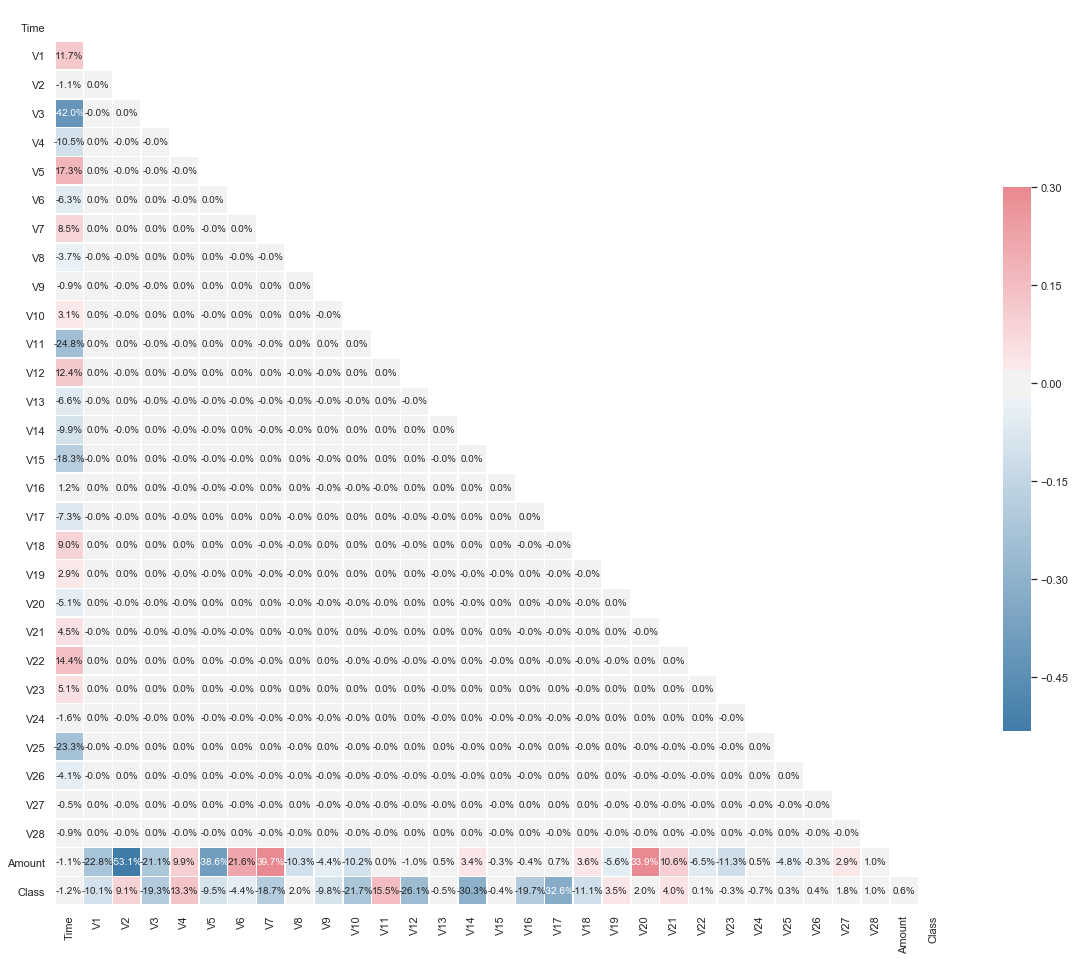

In [9]:
print_best_corelations(df)
vis.plot_traingled_corr_mat(df)

## Corelation conclusions

* Principal component feaetures are not correlated with each other.
* It is caused by unbalanced data, which means that real correlations are not found.

## Transactions analysis

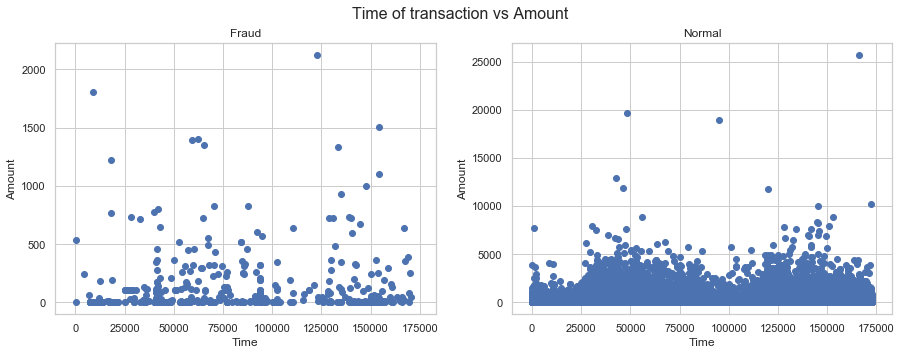

In [9]:
vis.plot_transactions_scatter(df)

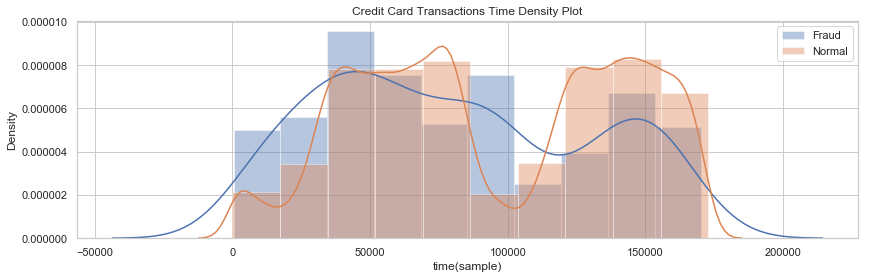

In [10]:
vis.plot_transactions_density(df)

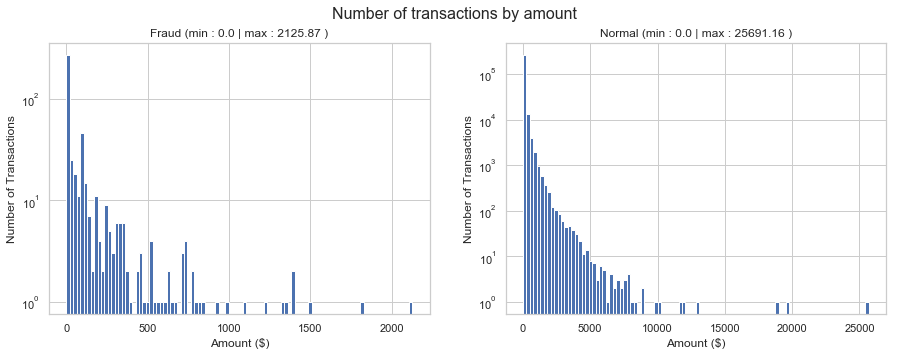

In [11]:
vis.plot_transactions_historagram(df)

#### Empirical distribution function 

In statistics, an empirical distribution function is the distribution function associated with the empirical measure of a sample. This cumulative distribution function is a step function that jumps up by 1/n at each of the n data points. Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value.

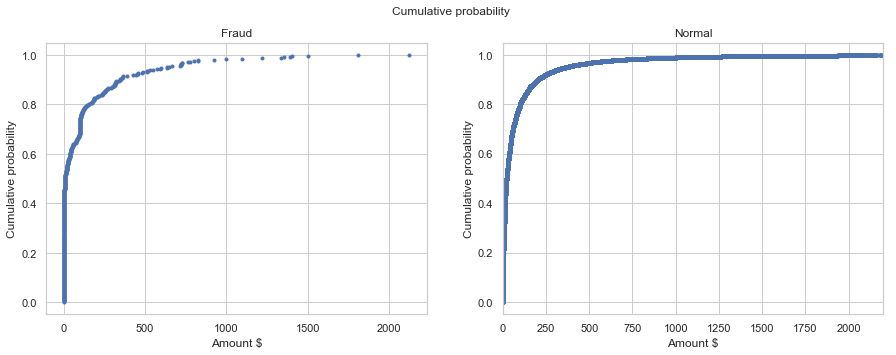

In [12]:
vis.plot_ecdf(df)

### Transactions conclusion 

* Fraud transactions range from 0 to 2200
* The maximum value of Fraud transaction is more than **10 times smaller than the largest normal transaction**
* About 90% of fraud transactions is 250 dolars or less
* About 90% of normal transactions is 125 or less

## Next - Data Preprocessing

https://www.kaggle.com/nikhilxavier/credit-card-fraud-analysis-in-detail
    
Na podstawie tego zrobi dystrybucje po czasie i po Pieniążkach, a potem zrobić to z podziałem na klasy :)